# Simple matplotlib based plotting

The plotting story is again one of its own. Together with the growing success of `numpy` and its syntactical relation to Matlab, another package was growing to fill an essential gap. John Hunter started to work on *Matplotlib*. The idea was to sort of offer a close alternative for creating plots in Python just the way it was done in Matlab. This was an essential missing piece for people wanting to replace Matlab with a Python based workflow. And being close to Matlab was key for the success here. *Matplotlib* was not the first plotting solution for Python. But as it developed, it became the by far most successful and complete one. Today it is considered to be the defacto standard for plotting. Most plotting examples which can be found in the internet will be *Matplotlib* based these days, although there are some promising and very interesting alternatives, being much more pythonic than *Matplotlib* is.

:::{figure} images/john_d_hunter.jpg
---
alt: john_d_hunter
width: 400px
align: center
name: john_d_hunter
---
John D. Hunter (Courtesy unknown)
:::

However, as *Matplotlib* is the most commonly used package these days, we'll be using it for our Python journey. *Matplotlib* is quite a huge plotting package. For offering a clean interface a lot of submodules have been created aggregating different aspects of the package. All simple plotting related functionality following the old Matlab idioms with an interface as much Pythonic as possible can be found in the `pyplot` submodule. It's usually imported using `import matplotlib.pyplot as plt`. You will see this way of importing this functionality a lot when searching for specific solutions in the internet. To make plotting work nicely and being interactive in the Jupyter Notebook, we have to specify the plotting backend explicitely. The so called *cell magic* `%matplotlib widget` is doing this for us. Behind the scenes a vector based rendering engine is chosen by this, and every plot gets some widgets for selecting, zooming and paning in the plots, making those plots very interactive, which helps exploring the data displayed a lot.

Another package gaining more popularity these days is *seaborn*. It has its origin in statistics, and specifically offers some very special statistics orientated plot types. It can be used though for adding a more modern look to *Matplotlib* plots. Whilst *Matplotlib* has been created with publication quality plots in mind, these bare *Matplotlib* plots look a bit fallen out of time, and it takes a lot of time ans skills to change that. *seaborn* offers a way to do this with basically just one line of code by changing *Matplotlib*s underlying stylesheets to create a different look.

So a basic preparation to be able to create a plot works like this

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Displaying one dimensional data

Before we create our first plot some essential elements are worth a deeper look to fully understand what is necessary to display data and play with it.

First and foremost a *Figure* object is needed. This is the top level element handled and visualized. All further elements create a hierarchy below the figure element.
That *Figure* element will hold an axis pair, which basically represents our coordinate system. This axis pair is the root of all further plotting and styling. It offers several plotting typs for line plots, scatter plots, bar plots and so on.
Further more there are methods to add labels to the axes to describe the meaning of the data plotted, to add a title to the plot, set axis limits, add grid lines, and so forth. You get the idea.

A very simple plot will look like this for example and will create a simple line plot.

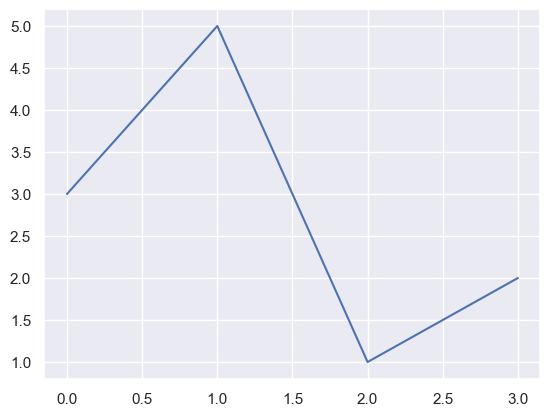

In [6]:
fig = plt.Figure()
axes = fig.add_subplot(111)
axes.plot([0, 1, 2, 3], [3, 5, 1, 2])
fig

As a figure will always have at least on subplot to be useful, helper functions have been created to join the two steps and the related parametrization. This way of creating plots becomes increasingly popular and for me is the preferred way to do things. Our initial example will look like the following using the helper function joining figure and axes creation.
As a bonus, we specify the size of the resulting plot in inches as a tuple, and set the resolution of the plot in dots per inch. The real size of the plot is dependent on the settings of the displaying target, e.g size and resolution of a monitor or printer. 
Furthermore we add labels to the axes, add a plot title and ask the plotting package to use a very tight layout minimising white space around the plot. There is also a slight change in the look of the line plot. We explicitely ask the `plot` method to use a line plot with blue dots at each data point, hence the parameter "bo-", and finally set the markers size to 2.

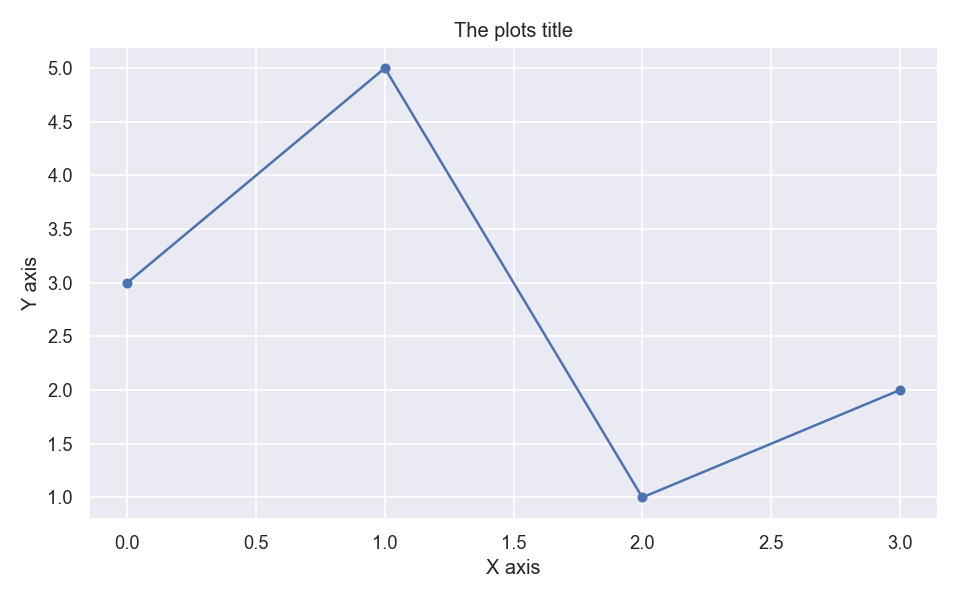

In [13]:
fig, axes = plt.subplots(figsize=(8, 5), dpi=120)
axes.plot([0, 1, 2, 3], [3, 5, 1, 2], "bo-", markersize=5)
axes.set_xlabel("X axis")
axes.set_ylabel("Y axis")
axes.set_title("The plots title")
plt.tight_layout()

These `plot` calls can be repeated to add more plots to an existing figure. To create a plot showing a sine and cosine curve for example we would do the following with the help of the *numpy* package.

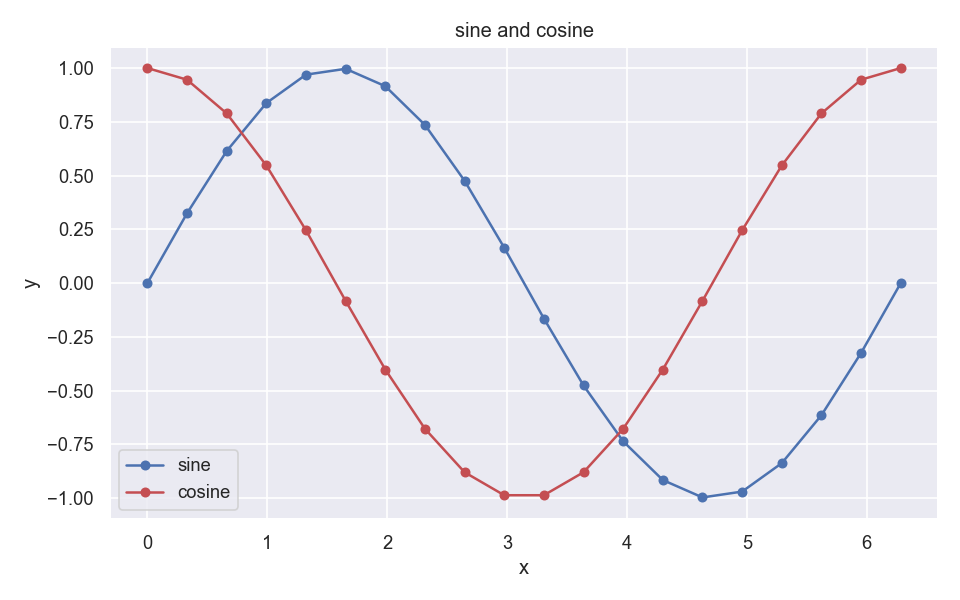

In [18]:
import numpy as np

x = np.linspace(0, 2 * np.pi, 20)
sine = np.sin(x)
cosine = np.cos(x)

fig, axes = plt.subplots(figsize=(8,5), dpi=120)
axes.plot(x, sine, "bo-", markersize=5, label="sine")
axes.plot(x, cosine, "ro-", markersize=5, label="cosine")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title("sine and cosine")
plt.legend()
plt.tight_layout()

We added just a few lines compared to our simple plotting example before.

First, we created an array of 20 evenly spaced numbers in the interval `[0, 2*pi[`, calculated the sine and cosine values with the help of the corresponding `numpy` function calls.
Next, we created a figure as usual, calling `plot` now twices for each dataset with respective styling for a blue and a red line. Additionally we provided a label for each plot call, which is used by the `legend` call later to create a small box aiding to identify which plot is which.
The location of the box is chosen automatically to not at all cover the data display, or at least to disturb as minimal as possible. There are ways however to place the legend more specifically. Care should be taken here however as in most cases, the plot will no longer look this consistent. So don't feel tempted to change default behaviour if not explicitely necessary. 

Let's explore some more basic and typical plot types. To create a bar chart for example you can use code comparable to the following

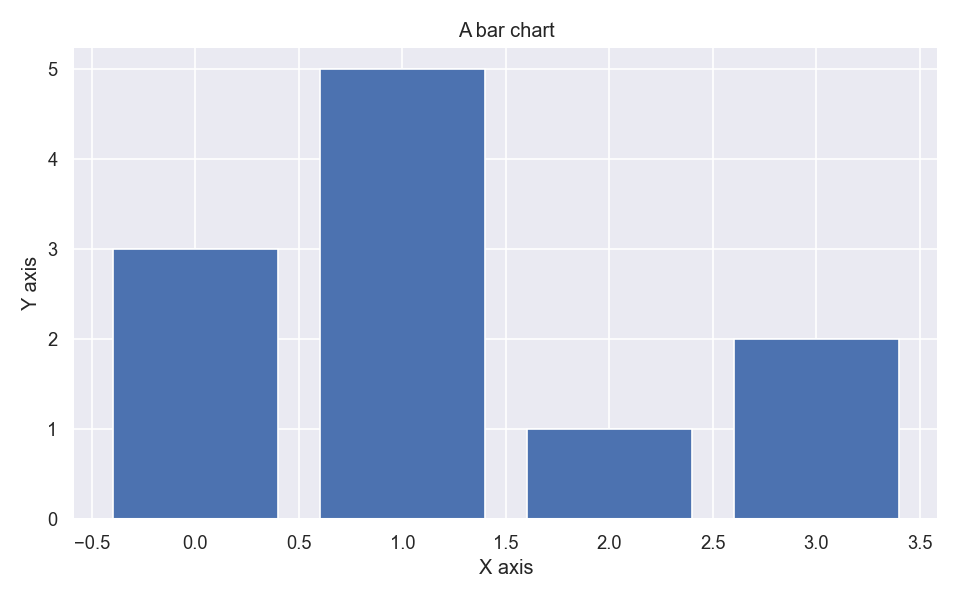

In [25]:
fig, axes = plt.subplots(figsize=(8,5), dpi=120)
axes.bar([0, 1, 2, 3], [3, 5, 1, 2])
axes.set_xlabel("X axis")
axes.set_ylabel("Y axis")
axes.set_title("A bar chart")
plt.tight_layout()

A pie chart basically goes like this.

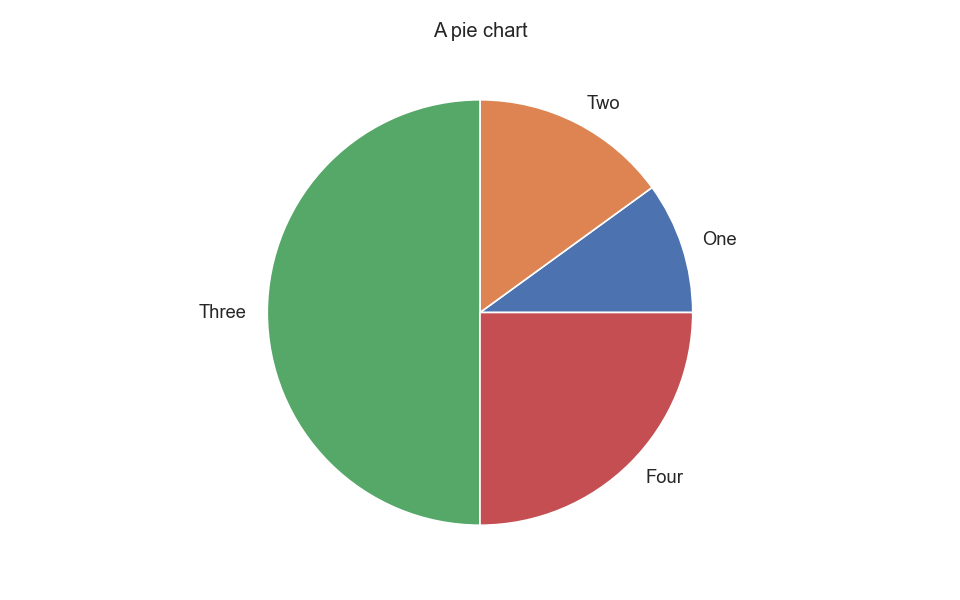

In [34]:
fig, axes = plt.subplots(figsize=(8,5), dpi=120)
axes.pie([10, 15, 50, 25], labels=["One", "Two", "Three", "Four"])
axes.set_title("A pie chart")
plt.tight_layout()

A fina plot example for point based data used quite often is the `scatter` plot. To show how this plot works we'll create some data for it first.

In [78]:
x = np.random.random((100,))
y = np.random.random((100,))
c = np.random.random((100,))
s = 10 * np.random.random((100,))

And now we can create the scatter plot. The call signature for scatter plots differs from the simple plot call a bit and is more flexible. The first two expected parameters are the `x` and `y` locations for the data. The color is chosen based on the values in the `z` array here by assigning it to the `c` parameter, and the `s` argument can be used to specify the size of each data point. Even this can be specified by using an array of proper length.

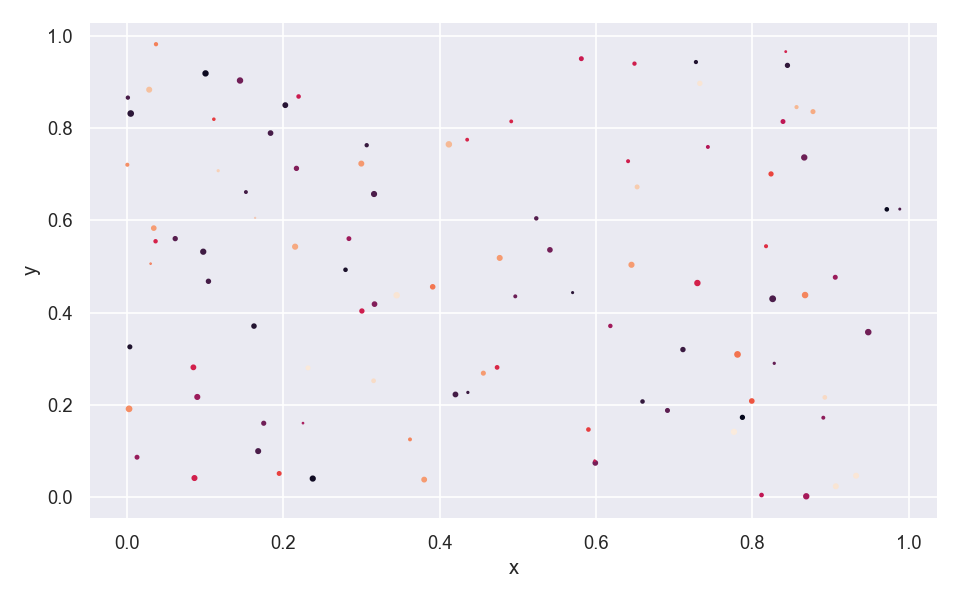

In [77]:
fig, axes = plt.subplots(figsize=(8,5), dpi=120)
axes.scatter(x, y, c=c, s=s)
axes.set_xlabel("x")
axes.set_ylabel("y")
plt.tight_layout()

So by using a `scatter` plot a four dimensional dataset can be visualized in 2D space by mapping the values in each dimension to the x and y location, as well as the color and size of the dataset. Pretty powerful!

## Working with two dimensional data

Displaying two dimensional data is possible as well of course. Let's create some interesting looking data for this first using some helpers from the `numpy` package again.

In [38]:
x = np.arange(0, 2 * np.pi, .1)
y = np.arange(0, 2 * np.pi, .25)
X, Y = np.meshgrid(x, y)
C = np.sin(X) * np.cos(Y)

And now that we have this nice 2D sinusoidal pattern in 3D space, we can visualize it using a color plot.

/var/folders/4f/zxcbb2rd6q98m0h5fzm9xljm0000gn/T/ipykernel_9796/61970169.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(im, location="bottom")


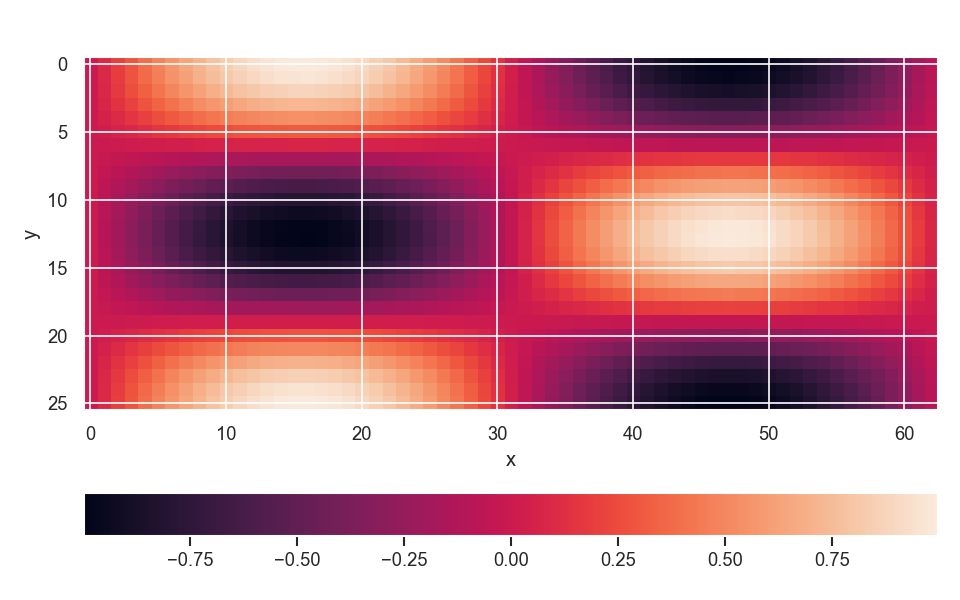

In [57]:
fig, axes = plt.subplots(figsize=(8,5), dpi=120)
im = axes.imshow(C)
axes.set_xlabel("x")
axes.set_ylabel("y")
plt.colorbar(im, location="bottom")
plt.tight_layout()

`imshow` is used here to create the false color plot. It returns a *mappable* in this case, which can be used by the `colorbar` function call to add a color bar to the plot, located at the bottom.
As you may have noticed already by the functions name, `imshow` is for plotting *image* like data. Every 2D array will work here, with the restriction, that the axis dimensions are not respected here. Just pixels are counted and referenced here.
This can be corrected by changing the axis properties later on or chosing a more general plotting type, such as the filled contour plot.

/var/folders/4f/zxcbb2rd6q98m0h5fzm9xljm0000gn/T/ipykernel_9796/2180038987.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(im, location="bottom")


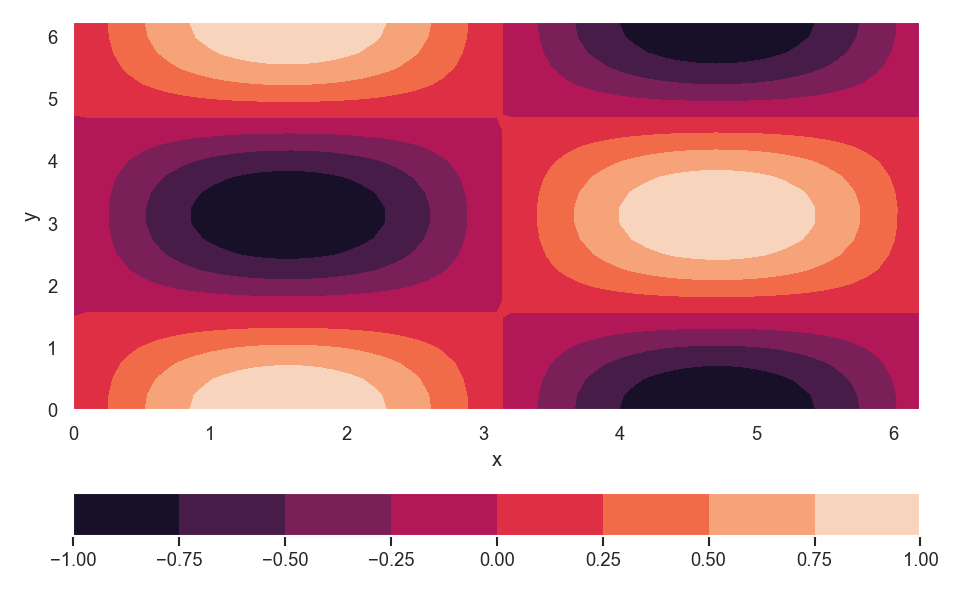

In [58]:
fig, axes = plt.subplots(figsize=(8,5), dpi=120)
im = axes.contourf(x, y, C)
axes.set_xlabel("x")
axes.set_ylabel("y")
plt.colorbar(im, location="bottom")
plt.tight_layout()

Here the axis ticks are correctly matching the data, as we were able to specify the `x` and `y` arrays together with `C` for the plot call. However this plot type is a bit slower to render than an imshow call. For a quick overview on the data using `imshow` might be preferable because of this.

Another valid alternative to display this sort of data is the standard contour plot. Its almost totally matching the filled contour plot call.

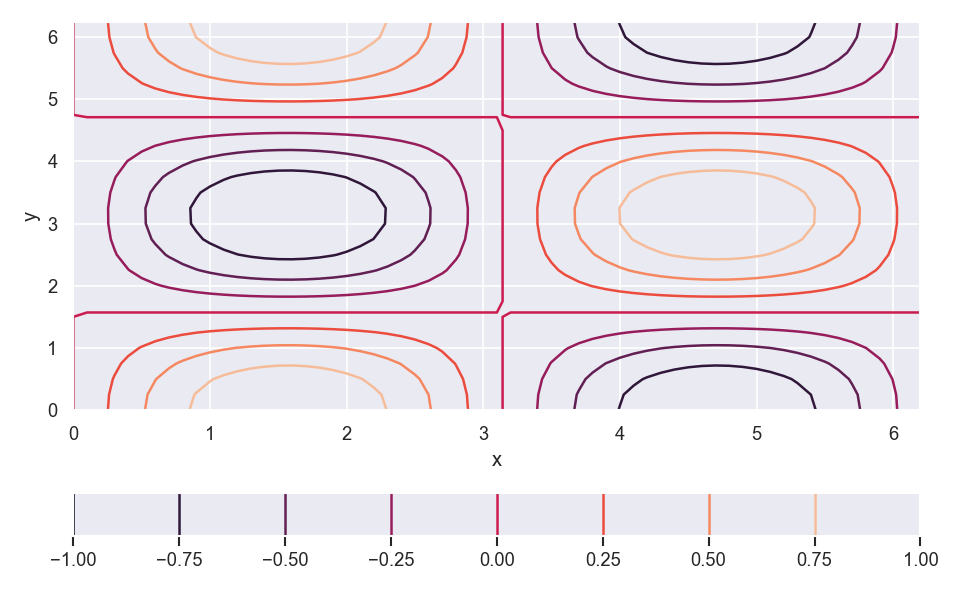

In [59]:
fig, axes = plt.subplots(figsize=(8,5), dpi=120)
im = axes.contour(x, y, C)
axes.set_xlabel("x")
axes.set_ylabel("y")
plt.colorbar(im, location="bottom")
plt.tight_layout()

## Displaying Data in 3D space

*Matplotlib* is also able to handle simple 3D plots. To illustrate this let's create a simple parametric curve in space.

We'll have to make use of a new parameter to create the axes within the figure here. There is not helper function to create both the figure and the axes in oe go here, so we need to do that in the classic way. Furthermore 3D *Matplotlib* plots don't play well with seaborn styling. So we reset these settings to the *Matplotlib* original ones.

Other than that we use a simple parametric definition for a nice spring shaped curve in space, calculate the corresponding point cloud and plot it in the same way it was done in the 2D case, the only difference being, that now three vectors are necessary to create the plot. 

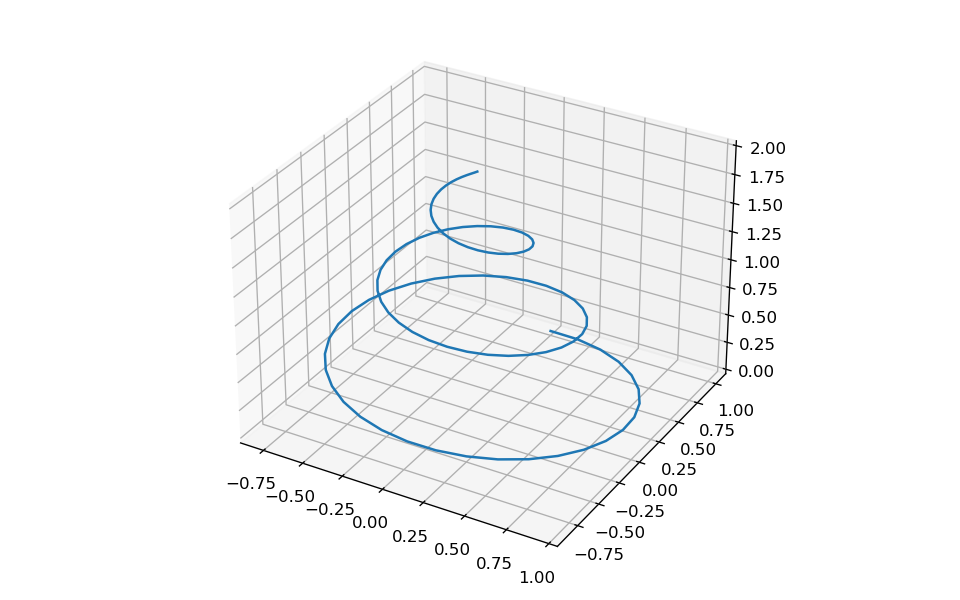

In [103]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

sns.reset_orig()

number_of_points = 100
phi = np.linspace(0, 3 * 2 * np.pi, number_of_points)
r = np.linspace(1, .1, number_of_points)

x = r * np.sin(phi)
y = r * np.cos(phi)
z = np.linspace(0, 2, number_of_points)


fig = plt.figure(figsize=(8,5), dpi=120)
axes = plt.subplot(projection="3d")
axes.plot(x, y, z)
plt.tight_layout()